# Exploratory Data Analysis

#### Data Understanding : Load the data and check the data structure

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Loading Data
df_history = pd.read_json('C:/Users/DELL/Downloads/Spotify Account Data/StreamingHistory_music_0.json')  # Use forward slashes in the file path

In [3]:
df_history.head()
df_history.info()
df_history.describe()
df_history.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     2986 non-null   object
 1   artistName  2986 non-null   object
 2   trackName   2986 non-null   object
 3   msPlayed    2986 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.4+ KB


(2986, 4)

#### Data Cleaning : Handle Missing Values, Check for Duplicates, Correct Data Types

In [4]:

df_history.isna().sum()    # Check for missing values

df_history.duplicated().sum()   # Check for duplicates

df_history.rename(columns={'endTime': 'listened_time','artistName': 'artist_name','trackName': 'track_name'}, inplace=True)    # Correct Data types
df_history['listened_time'] = pd.to_datetime(df_history['listened_time'])

df_history = df_history[df_history['msPlayed'] != 0]     # This filters the DataFrame, keeping only the rows where 'msPlayed is not equal to 0'.
df_history.reset_index(inplace=True, drop=True)

In [5]:
# # Display the DataFrame
display(df_history)
df_history.info()

,listened_time,artist_name,track_name,msPlayed
0,2023-06-05 16:41:00,Fiji Blue,Another Day,153267
1,2023-06-05 16:42:00,Fiji Blue,Picture,60017
2,2023-08-23 14:36:00,San Joseph,How To Miss You,186640
3,2023-08-23 14:39:00,San Joseph,How To Miss You,186640
4,2023-08-23 14:42:00,San Joseph,How To Miss You,186640
...,...,...,...,...
2793,2024-08-06 14:35:00,The Beaches,Takes One To Know One,167996
2794,2024-08-06 14:38:00,The Beaches,Takes One To Know One,167996
2795,2024-08-06 14:40:00,The Beaches,Takes One To Know One,167996
2796,2024-08-06 14:43:00,The Beaches,Takes One To Know One,167996


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listened_time  2798 non-null   datetime64[ns]
 1   artist_name    2798 non-null   object        
 2   track_name     2798 non-null   object        
 3   msPlayed       2798 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 87.6+ KB


### Identifying my most played songs.

Groups DataFrame by `artist_name` and `track_name`, counting the occurrences of each track_name per artist. The final DataFrame, `df_song_count`, shows the frequency of each track_name with each artist.

In [6]:
# Group by artist_name and track_name and count the number of occurrences
df_song_listen_count = df_history.groupby(['artist_name', 'track_name']).size()

# Name the count column as song_count
df_song_listen_count = df_song_listen_count.reset_index(name='song_count')

# Sort the values by song_count in descending order
df_song_listen_count.sort_values(by='song_count', ascending=False, inplace=True)


In [7]:
df_plot1=df_song_listen_count.head(10)
df_plot1

,artist_name,track_name,song_count
617,San Joseph,How To Miss You,60
706,Troye Sivan,Got Me Started,55
385,Lauv,Love U Like That,50
259,Harry Styles,Golden,30
263,Harry Styles,"Sunflower, Vol. 6",23
528,Nicki Minaj,Everybody (feat. Lil Uzi Vert),23
96,Blake Rose,Movie,22
97,Blake Rose,Never Let Go,21
684,The Chainsmokers,Summertime Friends,20
293,James Arthur,Bitter Sweet Love,19


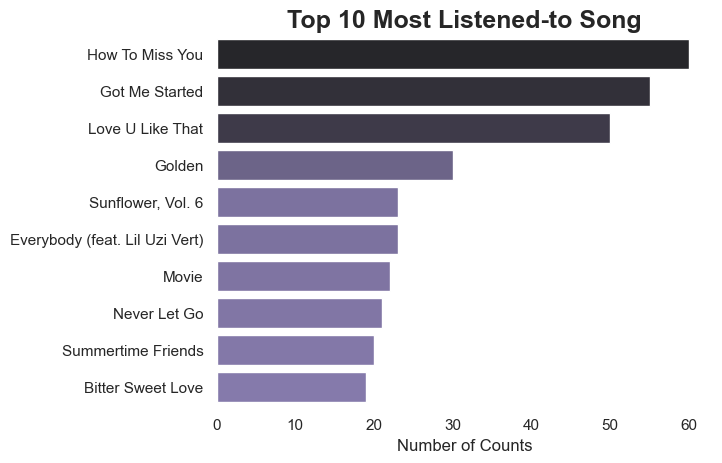

In [8]:
sns.set_theme(style='white')
sns.barplot(data=df_plot1, x='song_count', y='track_name', hue='song_count', palette='dark:m_r',legend=False)
sns.despine(left=True, bottom=True)
plt.title('Top 10 Most Listened-to Song',fontsize=18, weight='bold')
plt.ylabel('')
plt.xlabel('Number of Counts')
plt.show()


### Determine which artists you listen to the most.

In [9]:
#to_frame() converts the Series into a DataFrame
df_plot2 = df_history['artist_name'].value_counts().head(10).to_frame()
df_plot2

,count
artist_name,
Blake Rose,162
Lauv,130
Troye Sivan,116
Harry Styles,111
Nicki Minaj,111
San Joseph,99
Lewis Capaldi,84
Gracie Abrams,82
James Arthur,69


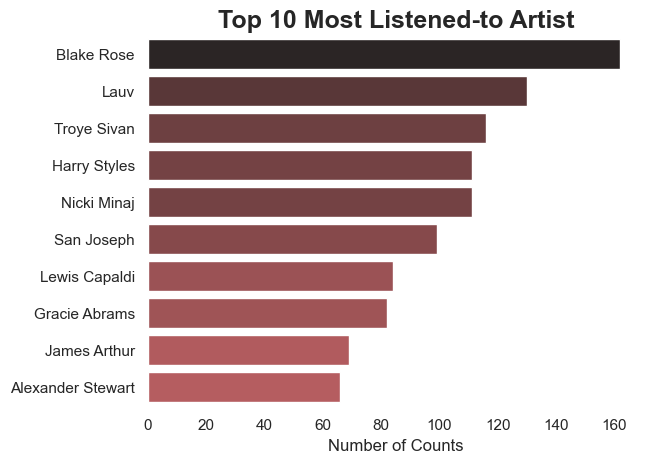

In [10]:
sns.set_theme(style='white')
sns.barplot(data=df_plot2, x='count', y='artist_name', hue='count', palette='dark:r_r', legend=False)
sns.despine(left=True, bottom=True)
plt.title('Top 10 Most Listened-to Artist',fontsize=18, weight='bold')
plt.xlabel('Number of Counts')
plt.ylabel('')
plt.show()

In [11]:
# Extract year and month from 'listened_time'
df_history['year'] = df_history['listened_time'].dt.year
df_history['month'] = df_history['listened_time'].dt.month


df_date_count = df_history.groupby(['year', 'month']).size().reset_index(name='count')


years = df_history['year'].unique()
months = range(1, 13)

# Create a DataFrame for all combinations of year and month
all_combinations = pd.MultiIndex.from_product([years, months], names=['year', 'month'])
df_all = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original data, filling missing values with 0
df_final = pd.merge(df_all, df_date_count, on=['year', 'month'], how='left').fillna(0)

# Convert the 'count' column to integer type (as NaN values have been filled with 0)
df_final['count'] = df_final['count'].astype(int)
df_final


,year,month,count
0,2023,1,0
1,2023,2,0
2,2023,3,0
3,2023,4,0
4,2023,5,0
5,2023,6,2
6,2023,7,0
7,2023,8,48
8,2023,9,206
9,2023,10,228


### Determine my Listening Count per Month for Each Year

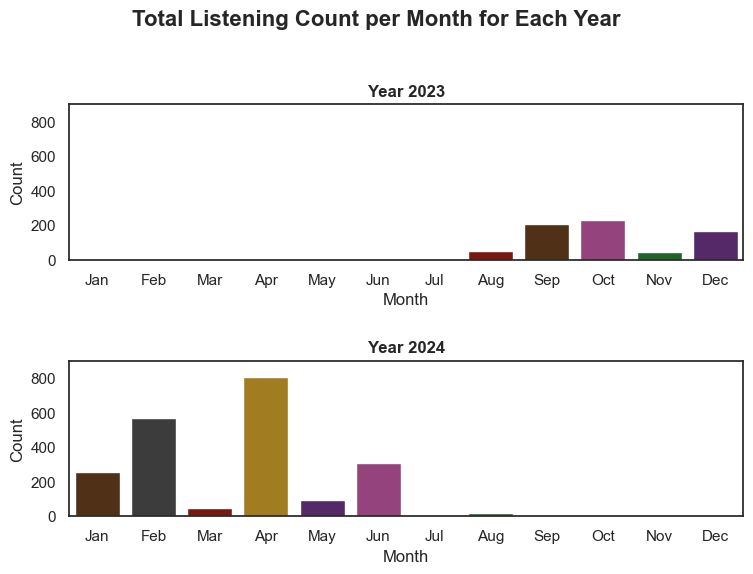

In [12]:
n_years = df_history['year'].unique().tolist()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

# Plotting
sns.set_theme(style='ticks')

# Month mapping for proper labels
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

for i, yr in enumerate(n_years):
    df_plot = df_final[df_final['year'] == yr]
    df_plot = df_plot.sort_values(by='month')  # Sort by month for proper x-axis ordering

    # Apply the mapping to the DataFrame
    df_plot['month'] = df_plot['month'].map(month_mapping)

    # Plot the barplot
    sns.barplot(data=df_plot, y='count', x='month', ax=axs[i], hue='count', palette='dark',legend=False)
    
    axs[i].set_title(f'Year {yr}', weight='bold')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Month')
    axs[i].grid(False)
    axs[i].set_ylim(0, 900)

# Adjust layout 
fig.suptitle('Total Listening Count per Month for Each Year', fontsize=16, weight='bold')
fig.tight_layout(pad=2.0)  # Adjust padding to prevent overlap

plt.show()